# K Nearest Neighbors Classifier: Fit and evaluate a model

In [1]:
import joblib
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
tr_features=pd.read_csv('train_features.csv')
tr_labels=pd.read_csv('train_labels.csv')

te_features=pd.read_csv('test_features.csv')
te_labels=pd.read_csv('test_labels.csv')

Text(0, 0.5, 'Error Rate')

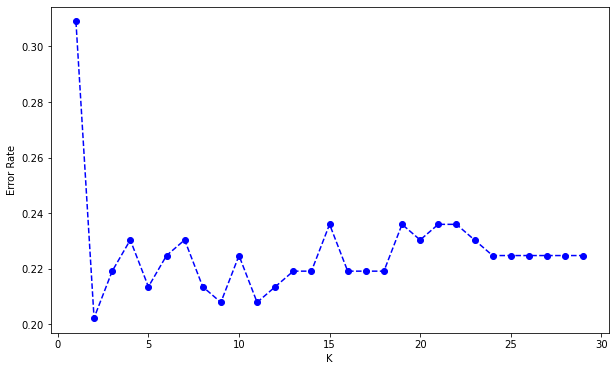

In [3]:
error_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(tr_features, tr_labels.values.ravel())
    pred_i=knn.predict(te_features)
    error_rate.append(np.mean(pred_i!= te_labels.values.ravel()))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue', ls='--', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [4]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(tr_features, tr_labels.values.ravel())  #column vactor to array

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [5]:
joblib.dump(knn, 'KNN_model.pkl')

['KNN_model.pkl']

In [6]:
pred_te = knn.predict(te_features)

In [7]:
print(pred_te)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1]


In [8]:
print(classification_report(te_labels, pred_te))
print(confusion_matrix(te_labels, pred_te))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       113
           1       0.82      0.57      0.67        65

    accuracy                           0.80       178
   macro avg       0.81      0.75      0.76       178
weighted avg       0.80      0.80      0.79       178

[[105   8]
 [ 28  37]]
